In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

data = pd.read_csv ("BKB.csv")
married_data=data[data['Gender'] == 'Female']
nom_data=data[data['Gender'] != 'Female']

In [43]:
data.head()

,Applicant ID,Loan Type,Gender,Marital Status,Accomodation Type,No of years in the current address,No. of Years in the current job,Monthly Salary,Balance in Savings Account,Loan Amount Requested,Term,Down Payment,EMI Affordable
0,1,Home Loan,Male,Married,Family Other,32,7,8000,1406,500000,120,700000,8690
1,2,Home Loan,Male,Married,Family Other,3,17,30000,42235,1000000,180,300000,16000
2,3,Home Loan,Male,Married,Company Provided,7,8,8000,15217,700000,120,955000,15000
3,4,Home Improvement,Male,Married,Owned,15,7,20462,29551,250000,84,250000,5856
4,5,Home Loan,Male,Married,Family Other,4,10,13534,2056,400000,180,700000,6157


In [3]:
data.describe()

,Applicant ID,No of years in the current address,No. of Years in the current job,Monthly Salary,Balance in Savings Account,Loan Amount Requested,Term,Down Payment,EMI Affordable
count,3864.000000,3864.000000,3864.000000,3864.000000,3.864000e+03,3864.000000,3864.000000,3.864000e+03,3.864000e+03
mean,1932.500000,10.600414,10.926501,22618.984472,3.158295e+04,609055.261905,160.158126,4.274711e+05,1.288153e+04
std,1115.585048,10.905176,8.086977,19783.322389,1.274989e+05,245075.074723,37.995737,6.380023e+05,3.295702e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,50000.000000,15.000000,0.000000e+00,8.400000e+01
25%,966.750000,2.000000,5.000000,12200.750000,1.500000e+03,400000.000000,180.000000,2.000000e+05,7.696000e+03
50%,1932.500000,6.000000,10.000000,19000.000000,6.357500e+03,600000.000000,180.000000,3.000000e+05,1.077400e+04
75%,2898.250000,15.000000,15.000000,28500.000000,2.500000e+04,800000.000000,180.000000,5.000000e+05,1.500000e+04
max,3864.000000,92.000000,65.000000,500000.000000,5.388413e+06,1000000.000000,180.000000,1.700000e+07,1.200000e+06


# Hypothesis Testing

#### Hypothesis testing is an act in statistics whereby an analyst tests an assumption regarding a population parameter. The methodology employed by the analyst depends on the nature of the data used and the reason for the analysis. Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data.

# Z-Test
#### This a hypothesis test that uses the z-score as a test statistic. The sample size needs to greater then the 30 or the standard deviation of the population should be known. We will use the z-value to get the p-value. This p-value found will be the probability that the null hypothesis occurs. We need to set an alpha value that will be our confidence in our hypothesis and this is usually 0.05 to 0.01. This would be the range of values that we will ensure that our test is (1-alpha)*100 sure of the null hypothesis not being true. 

### Null Hypothesis: Temperature >= 15 Alternate Hypothesis : Temperature <=15
### α = 0.05

In [44]:
data["Monthly Salary"].describe()

count      3864.000000
mean      22618.984472
std       19783.322389
min           0.000000
25%       12200.750000
50%       19000.000000
75%       28500.000000
max      500000.000000
Name: Monthly Salary, dtype: float64

In [45]:
zvalue= (15 - data["Monthly Salary"].mean()) / (data["Monthly Salary"].std() )
zprob=scipy.stats.norm.cdf(zvalue)
print("The probability of the null hypothesis is ",zprob)
print("This value is greater then the alpha value that we have. Therefore, the null hypothesis is not rejected")

The probability of the null hypothesis is  0.12660696881797762
This value is greater then the alpha value that we have. Therefore, the null hypothesis is not rejected


# T test
#### As a t-test is a parametric test of difference, we use it where we need to check the correlation between the group of continuous data. It can only be used for two groups of data. If you want to compare more than two groups of data then use the ANOVA test or post-hoc test.

# One sample t-test
#### Null Hypothesis: No. Of Years In The Current Address >= 15 Alternate Hypothesis : No. Of Years In The Current Address <15

In [7]:
new_df = data.sample(n = 30)

In [46]:
new_df['Monthly Salary'].describe()

count       30.000000
mean     22434.800000
std      14598.947245
min          0.000000
25%      11476.500000
50%      20000.000000
75%      30375.000000
max      70000.000000
Name: Monthly Salary, dtype: float64

In [47]:
mean = np.mean(new_df['Monthly Salary'])
std_error = np.std(new_df['Monthly Salary']) / np.sqrt(len(new_df['No of years in the current address']))
(mean, std_error)

(22434.8, 2620.5912307467306)

In [10]:
t = abs(mean - 15) / std_error
t

1.236976549122751

In [11]:
from scipy import stats

In [12]:
# Two tailed Student T test
# α = 0.05
t_crit = stats.t.ppf(q = 0.975, df = 29)
print("Critical value for t two tailed:",t_crit)

Critical value for t two tailed: 2.045229642132703


In [13]:
p_value = 2 * (1-stats.t.cdf(x = t, df = 29))
print("p-value:",p_value)

p-value: 0.2260194444006436


In [14]:
# One tailed T Test
# α = 0.05
t_crit = stats.t.ppf(q = 0.95, df = 29)
print("Critical value for t one tailed:",t_crit)

Critical value for t one tailed: 1.6991270265334972


# Two sample t-test

#### Taking the two features as Temperature and Apparent Temperature, 
#### H0 : There is no significant mean difference (μ1= μ2) 
#### H1 :  here is significant mean difference (μ1!= μ2)

In [15]:
new_df['Monthly Salary'].describe()

count    30.000000
mean     12.100000
std      13.060469
min       1.000000
25%       2.000000
50%       6.500000
75%      17.750000
max      51.000000
Name: No of years in the current address, dtype: float64

In [17]:
new_df['Monthly Salary'].describe()

count    30.000000
mean     11.433333
std       6.739914
min       1.000000
25%       6.000000
50%      10.000000
75%      15.000000
max      29.000000
Name: No. of Years in the current job, dtype: float64

In [48]:
sample_1 = new_df['Monthly Salary']
sample_2 = new_df['Loan Amount Requested']

In [49]:
sample1_bar, sample2_bar = np.mean(sample_1), np.mean(sample_2)
n1, n2 = len(sample_1), len(sample_2)
var_sample1, var_sample2= np.var(sample_1, ddof = 1), np.var(sample_2, ddof = 1)

In [50]:
# pooled sample variance
var = ( ((n1 - 1) * var_sample1) + ((n2 - 1) * var_sample2) ) / (n1 + n2 - 2)
# standard error
std_error = np.sqrt(var * (1.0 / n1 + 1.0 / n2))

In [51]:
print("sample_1 mean:", np.round(sample1_bar, 4))
print("sample_2 mean:", np.round(sample2_bar, 4))

sample_1 mean: 22434.8
sample_2 mean: 577233.3333


In [52]:
print("variance of sample_1:", np.round(var_sample1, 4))
print("variance of sample_2:", np.round(var_sample2, 4))

variance of sample_1: 213129260.6483
variance of sample_2: 83431702298.8506


In [53]:
print("pooled sample variance:",var)
print("standard error:",std_error)

pooled sample variance: 41822415779.74943
standard error: 52803.040177467956


In [54]:
# calculate t statistics
t = abs(sample1_bar - sample2_bar) / std_error
print('t static:',t)
# two-tailed critical value at alpha = 0.05
t_c = stats.t.ppf(q=0.975, df=12)
print("Critical value for t two tailed:",t_c)

t static: 10.506942999279731
Critical value for t two tailed: 2.1788128296634177


In [55]:
# one-tailed critical value at alpha = 0.05
t_c = stats.t.ppf(q=0.95, df=12)
print("Critical value for t one tailed:",t_c)

Critical value for t one tailed: 1.782287555649159


In [56]:
# get two-tailed p value
p_two = 2*(1-stats.t.cdf(x=t, df=12))
print("p-value for two tailed:",p_two)

p-value for two tailed: 2.0935743849648247e-07


In [57]:
# get one-tailed p value
p_one = 1-stats.t.cdf(x=t, df=12)
print("p-value for one tailed:",p_one)

p-value for one tailed: 1.0467871924824124e-07


#### As observed in the output the p value is greater than the alpha value we are in support of the null hypothesis. Therefore there is no significant mean difference between the two samples.

# Paired T Test
#### These may be two measurements on each individual subject. (For example, Before and After 'treatment' scores on a questionnaire, exam, or lab test.)
#### H0 : There is no change after the engine oil (x̄ 1= x̄ 2)
#### H1 : There is a change after the engine oil (x̄ 1!= x̄ 2)

In [58]:
# Paired T Test for showing Before and After Results
# pre holds the mileage before applying
# the different engine oil
pre = [88, 82, 84, 93, 75, 78, 84, 87,
95, 91, 83, 89, 77, 68, 91]
# post holds the mileage before applying
# the different engine oil
post = [91, 84, 88, 90, 79, 80, 88, 90,
90, 96, 88, 89, 81, 74, 92]

Text(0, 0.5, 'Post')

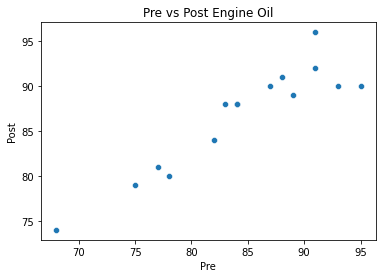

In [29]:
ax = sns.scatterplot(x = pre, y = post)
ax.set_title("Pre vs Post Engine Oil")
ax.set_xlabel("Pre")
ax.set_ylabel("Post")

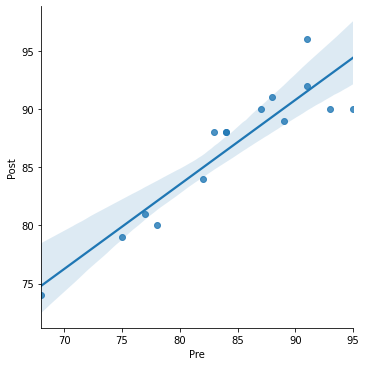

In [30]:
df = pd.DataFrame()
df['Pre'] = pre
df['Post'] = post
ax = sns.lmplot(x = "Pre", y = "Post", data = df)

In [31]:
# Performing the paired sample t-test
stats.ttest_rel(pre, post)

Ttest_relResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272)

#### As the p-value comes out to be equal to 0.01007 which is less than 0.05 hence we reject the null hypothesis. So, we have enough proof to claim that True mean test score is different for cars before and after applying the different engine oil. 

#### Checking whether there has been improvement in the marks from ISA to ISA.
#### H0 : There is no improvement in the marks (x̄ 1= x̄ 2)
#### H1 : There is an improvement in the marks (x̄ 1!= x̄ 2)

In [32]:
ISA2 = [17,13,17,10,19,19,13,14,16,10,15,8,9,13,7,13,13,12,17,12,12,12,19,16,16,10,9,16,16,17,11,8,17,14,15,10,15,9,9,18,15,7,13,18,7,18,14,15,5,15,10,13,13,16,8,11,12,11]
ISA3 = [18,10,16,9,14,10,11,7,10,11,10,5,9,7,6,15,11,9,10,11,5,4,13,12,13,15,12,19,7,6,11,12,16,9,16,9,12,6,14,11,8,8,10,18,8,11,12,11,7,14,7,12,11,17,14,18,14,8]

Text(0, 0.5, 'ISA3')

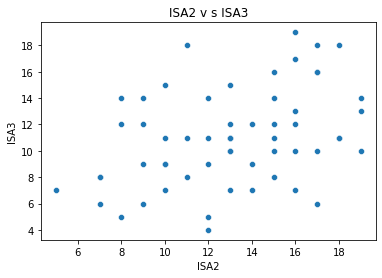

In [33]:
ax = sns.scatterplot(x = ISA2, y = ISA3)
ax.set_title("ISA2 v s ISA3")
ax.set_xlabel("ISA2")
ax.set_ylabel("ISA3")

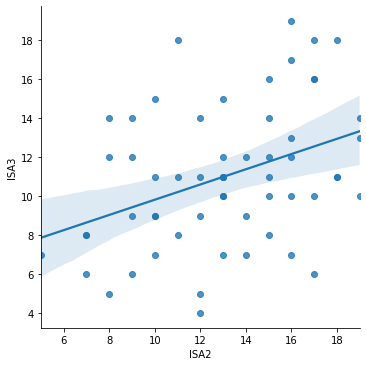

In [35]:
df = pd.DataFrame()
df['ISA2'] = ISA2
df['ISA3'] = ISA3
ax = sns.lmplot(x = "ISA2", y = "ISA3", data = df)

In [37]:
stats.ttest_rel(ISA2, ISA3)

Ttest_relResult(statistic=3.8822098553768263, pvalue=0.00027139429313903355)

#### As the p-value comes out to be equal to 0.000271 which is less than 0.05 hence we reject the null hypothesis. So, we have enough proof to claim that there is an improvement in the marks.

# Chi-Sqaure Test



In [41]:
data = [[50, 125, 90, 45], [75, 175, 30, 10]]
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 4.987377462630171e-14
Dependent (reject H0)


#### Since p-value < alpha, Therefore, we reject H0, that is, the movie does influence the decision behind having snacks